# DECISION TREE MODEL BUILD

## Importing required libraries

In [32]:
# !python3 -m pip uninstall scikit-learn imbalanced-learn -y

# !python3 -m pip install scikit-learn==1.2.2 imbalanced-learn==0.12.4

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE

## Load Train and Test Datasets

In [33]:
df_train = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/train.csv')
df_test = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/test.csv')

In [34]:
X_train = df_train.drop(['binary_attack'], axis=1)  # Features
y_train = df_train['binary_attack']  # Target variable

In [35]:
X_test = df_test.drop(['binary_attack'], axis=1)  # Features
y_test = df_test['binary_attack']  # Target variable

In [36]:
X_train, X_train_test, y_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Model Creation and Training

In [37]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [10, 20],
#     'min_samples_leaf': [5, 10],
#     'criterion': ['gini', 'entropy']
# }
# grid_search = GridSearchCV(
#     DecisionTreeClassifier(random_state=42), 
#     param_grid, 
#     scoring='precision', 
#     cv=5
# )
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)


In [38]:
dt_model = DecisionTreeClassifier(
    criterion='gini',  # Gini Impurity for splits (alternatively, 'entropy' can be used)
    max_depth=5,     # Limiting depth to prevent overfitting
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42    # For reproducibility
    
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

## Save the trained model

In [40]:
import joblib
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/"
model_filename = "NSL-KDD_DecisionTree.joblib"
model_path = model_folder + model_filename
joblib.dump(dt_model, model_path)
print(f"Decision Tree model saved to: {model_path}")

Decision Tree model saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/NSL-KDD_DecisionTree.joblib


## Evaluate the Model on Validation Set

In [41]:
y_train_test_pred = dt_model.predict(X_train_test)

## Validation Metrics

In [42]:
val_accuracy = accuracy_score(y_train_test, y_train_test_pred)
val_precision = precision_score(y_train_test, y_train_test_pred)
val_recall = recall_score(y_train_test, y_train_test_pred)
val_f1 = f1_score(y_train_test, y_train_test_pred)


print("Validation Metrics:")
print(f"Accuracy:   {val_accuracy:.2%}")
print(f"Precision:  {val_precision:.2%}")
print(f"Recall:     {val_recall:.2%}")
print(f"F1-score:   {val_f1:.2%}")

Validation Metrics:
Accuracy:   98.46%
Precision:  99.90%
Recall:     97.20%
F1-score:   98.53%


## Confusion Matrix for Validation Set

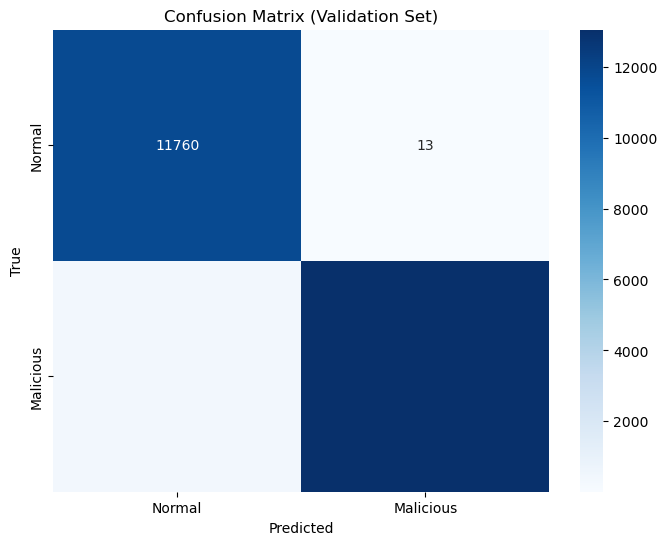

In [43]:
cm_val = confusion_matrix(y_train_test, y_train_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Malicious'],
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

## Test Metrics

In [44]:
y_test_pred = dt_model.predict(X_test)

In [45]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Metrics:")
print(f"Accuracy:   {test_accuracy:.2%}")
print(f"Precision:  {test_precision:.2%}")
print(f"Recall:     {test_recall:.2%}")
print(f"F1-score:   {test_f1:.2%}")


Test Metrics:
Accuracy:   90.54%
Precision:  84.81%
Recall:     95.07%
F1-score:   89.65%


## Confusion Matrix for Test Set

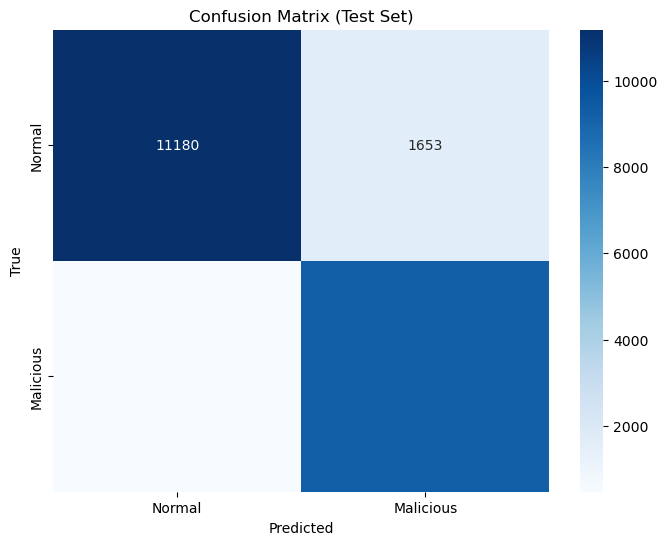

In [46]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Malicious'],
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()


In [49]:
# ## Save Evaluation Metrics Function
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print()
    print("Train Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test Set:
[[11180  1653]
 [  479  9232]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     12833
           1       0.85      0.95      0.90      9711

    accuracy                           0.91     22544
   macro avg       0.90      0.91      0.90     22544
weighted avg       0.91      0.91      0.91     22544


Train Set:
[[46833    24]
 [ 1499 52422]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     46857
           1       1.00      0.97      0.99     53921

    accuracy                           0.98    100778
   macro avg       0.98      0.99      0.98    100778
weighted avg       0.99      0.98      0.98    100778



## Visualize the Decision Tree

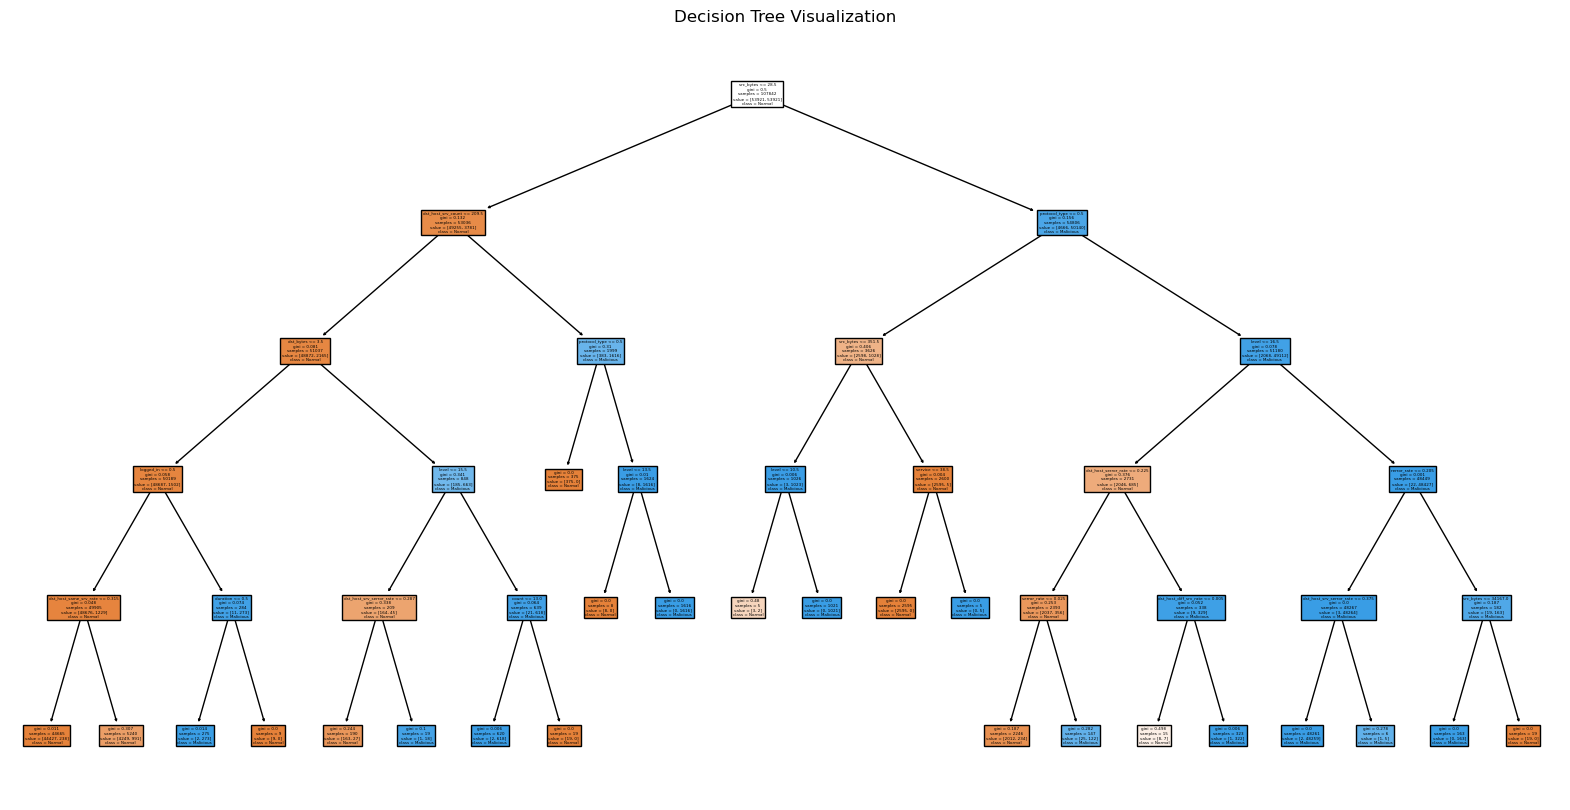

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=df_train.columns[:-1].tolist(), class_names=['Normal', 'Malicious'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()